# Demo: Access Distributed NASA Earth Science Data from OPeNDAP Services from your R Workspace
## Access time series of maximum temperature at an AmeriFlux site location

### Step 1. Load R package required in this demo

In [20]:
library("ncdf4")
library("repr")
library("IRdisplay")

### Step 2. Define location of interest: Ameriflux site (Sky Oaks Old / US-SO2)

In [21]:
mylat = 33.3739
mylon = -116.6229

### Step 3. Connect to the remote data and retrieve their metadata

#### Step 3.1. Daymet data 

In [22]:
daymet_url = "http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/1219/1990/tmax_1990.nc4"
daymet_data = nc_open(daymet_url)
daymet_data

File http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/1219/1990/tmax_1990.nc4 (NC_FORMAT_64BIT):

     6 variables (excluding dimension variables):
        short lambert_conformal_conic[]   
            grid_mapping_name: lambert_conformal_conic
            longitude_of_central_meridian: -100
            latitude_of_projection_origin: 42.5
            false_easting: 0
            false_northing: 0
            standard_parallel: 25
             standard_parallel: 60
            longitude_of_prime_meridian: 0
        float time_bnds[nv,time]   
            _ChunkSize: 1
             _ChunkSize: 2
        short yearday[time]   
            long_name: yearday
            valid_range: 1
             valid_range: 365
            _ChunkSize: 1
        float lat[x,y]   
            units: degrees_north
            long_name: latitude coordinate
            standard_name: latitude
            _ChunkSize: 496
             _ChunkSize: 542
        float lon[x,y]   
            units: degrees_ea

#### Step 3.2. Climatology data 

In [23]:
climatology_url = "http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/542/climate6190_TMX.nc4"
climatology_data = nc_open(climatology_url)
climatology_data

File http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/542/climate6190_TMX.nc4 (NC_FORMAT_64BIT):

     4 variables (excluding dimension variables):
        short climatology_bounds[nv,time]   
        double lat_bnds[nv,lat]   
            units: degrees_north
        double lon_bnds[nv,lon]   
            units: degrees_east
        short TMX[lon,lat,time]   
            _FillValue: -9999
            cell_methods: time: maximum within months time: mean over years
            long_name: Maximum Temperature
            units: degreeC
            valid_range: 0
             valid_range: 1000
            _ChunkSize: 6
             _ChunkSize: 180
             _ChunkSize: 360

     4 dimensions:
        lat  Size:360
            bounds: lat_bnds
            standard_name: latitude
            long_name: latitude
            units: degrees_north
        lon  Size:720
            bounds: lon_bnds
            long_name: longitude
            standard_name: longitude
            units: degr

### Step 4. Find out which grid cell contains the location of your interest

#### Step 4.1. Daymet data

In [24]:
daymet_lats = ncvar_get(daymet_data, "lat")
daymet_lons = ncvar_get(daymet_data, "lon")
daymet_dist = sqrt((daymet_lats - mylat)^2 + (daymet_lons - mylon)^2)
daymet_inds = which(daymet_dist == min(daymet_dist), arr.ind = TRUE)
daymet_x = daymet_inds[,1]
daymet_y = daymet_inds[,2]
sprintf("Daymet: x=%d, y=%d", daymet_x, daymet_y)

[1] "Daymet: x=529, y=2609"

#### Step 4.2. Climatology data 

In [25]:
climatology_lats = ncvar_get(climatology_data, "lat")
climatology_lons = ncvar_get(climatology_data, "lon")
climatology_x = which.min(abs(climatology_lons - mylon))
climatology_y = which.min(abs(climatology_lats - mylat))
sprintf("Climatology: x=%d, y=%d", climatology_x, climatology_y)

[1] "Climatology: x=127, y=247"

### Step 5. Retrieve data at the location of your interest for the whole year

#### Step 5.1. Daily Daymet data 

In [26]:
start = c(daymet_x, daymet_y, 1)
count = c(1, 1, 365)
daymet_tmax = ncvar_get(daymet_data, "tmax", start=start, count=count)
daymet_tmax

[1] 14.0 10.5  4.5  6.5 10.0 11.5 12.5 16.5 21.0 23.5 21.0 20.0 12.5  9.5  6.5
 [16]  5.5  3.0  1.0  5.0  6.0  8.0 11.5 16.5 16.0 14.0 15.0 14.5 14.5 14.5 14.0
 [31]  9.0  6.0  6.5  8.0 10.0  7.5 10.0 11.0  9.0  9.5 14.0 17.5 18.5 12.5  5.0
 [46]  0.5  4.0  5.5  5.0  4.0  9.0 14.5 16.0 17.5 20.5 20.0 19.0 19.0 20.0 21.0
 [61] 19.5 18.0 14.5 10.5 11.0 15.0 16.5 16.5 13.5 11.0  5.5  5.5  8.5 13.5 17.0
 [76] 18.0 21.5 23.0 24.5 23.5 24.5 25.0 25.0 23.5 22.0 20.0 11.5  9.0 14.0 13.0
 [91] 15.0 15.5 17.5 17.5 14.5 15.5 17.0 15.0 16.5 22.5 24.5 25.5 26.5 27.0 25.0
[106] 20.0 11.5 12.5 15.0 19.0 18.0 17.0 15.0 12.0 18.0 22.5 25.5 26.0 21.5 13.0
[121] 12.5 16.5 20.5 25.0 27.0 27.5 28.0 24.5 22.0 20.5 12.0 16.5 21.5 22.0 18.5
[136] 21.0 24.5 22.5 20.5 17.0 21.0 24.5 25.0 23.0 22.5 22.0 20.0 17.5 13.0 15.5
[151] 17.5 19.5 25.0 30.0 33.0 32.5 30.0 28.0 30.0 30.0 22.0 22.5 24.0 23.5 20.5
[166] 19.5 20.0 25.5 27.0 30.0 32.5 33.0 32.0 32.0 34.0 34.5 36.0 36.0 35.5 34.5
[181] 33.5 33.0 32.0 30.0 30.0 30.5 31.0 31.5 30.5 31.0 31.5 31.5 32.5 33.5 31.0
[196] 30.0 28.5 29.5 31.5 32.5 34.5 34.0 33.0 32.5 31.0 30.0 29.0 31.0 31.0 33.0
[211] 35.0 33.5 33.0 31.0 31.0 33.0 35.0 35.0 32.5 33.0 33.0 33.5 33.0 32.0 31.0
[226] 29.5 27.5 26.5 28.0 29.0 26.5 25.0 26.5 28.0 28.5 26.5 25.5 26.0 28.5 31.0
[241] 32.0 32.0 31.5 32.0 32.5 32.5 31.5 29.0 28.0 30.0 31.5 32.5 34.5 35.0 35.5
[256] 34.0 33.0 31.0 29.0 27.0 25.0 22.0 23.0 23.5 22.0 23.0 23.5 25.5 25.5 24.0
[271] 21.5 23.0 25.0 25.0 22.5 26.0 27.0 28.5 25.5 23.0 21.5 23.0 24.0 26.5 26.5
[286] 26.5 27.0 26.5 25.5 25.0 24.5 22.0 18.0 19.0 21.5 25.5 26.5 27.5 28.5 28.5
[301] 28.0 26.5 24.0 21.5 18.5 12.0 12.5 15.0 18.5 17.0 13.0 15.5 20.0 21.5 22.5
[316] 23.0 23.5 24.0 21.5 21.5 18.5 18.0 16.5 12.0 10.5 14.0 16.5 20.0 19.5 14.5
[331]  7.0 10.5 12.5 14.0 16.5 17.5 16.5 14.5 16.0 18.0 15.5 16.5 17.0 18.0 18.0
[346] 15.0 10.5 10.5 11.0  9.0  5.5  8.0  8.5  5.0 -1.0 -2.0 -1.5  0.0  5.0  7.5
[361]  7.5  7.0  6.5  4.0  9.0

#### Step 5.2. Monthly Climatology data 

In [27]:
start = c(climatology_x, climatology_y, 1)
count = c(1, 1, 12)
climatology_tmax = ncvar_get(climatology_data, "TMX", start=start, count=count)
climatology_tmax

[1] 14 15 16 18 22 26 30 30 27 23 18 14

### Step 6. Make a simple plot of the data 

pdf 
  2

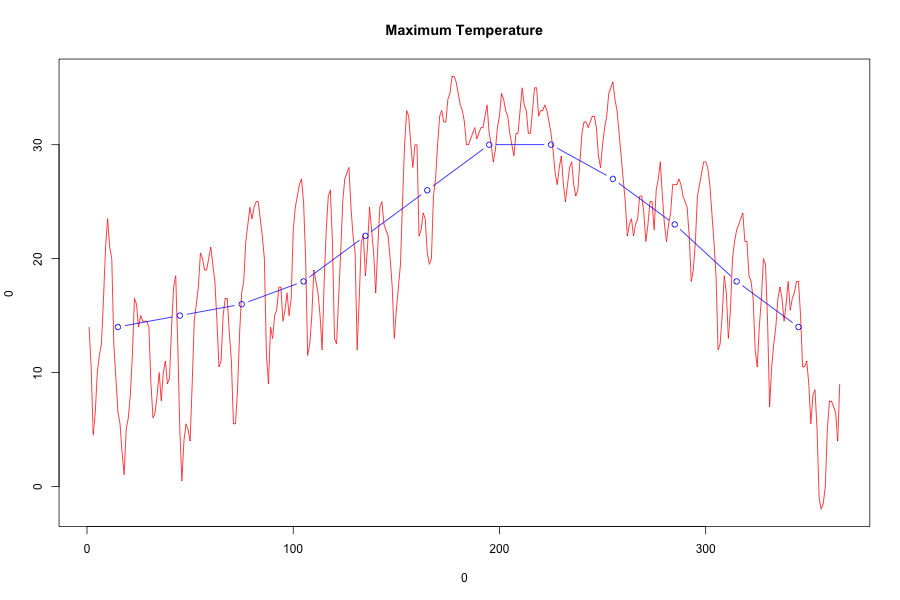

In [28]:
daymet_time = seq(1, 365, 1)
climatology_time = seq(15, 350, 30)

tf <- tempfile()
png(tf, width=900, height=600)
plot(0, 0, xlim = c(1,365), ylim = c(min(daymet_tmax), max(daymet_tmax)), type = "n")
lines(daymet_time, daymet_tmax, type="l", col="red")
lines(climatology_time, climatology_tmax, type="b", col="blue")
title("Maximum Temperature")

dev.off()

display_png(file = tf)